#import libraries

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


#DATA PREPROCESSING
### training image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
 

)

Found 12908 files belonging to 10 classes.


## validation image processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
 

)

Found 2761 files belonging to 10 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 48.         70.         23.       ]
   [ 48.8125     70.8125     23.8125   ]
   [ 49.         71.         22.625    ]
   ...
   [124.25      147.1875     74.375    ]
   [116.375     141.5625     74.125    ]
   [118.        144.         79.       ]]

  [[ 48.         70.         23.       ]
   [ 48.8125     70.8125     23.8125   ]
   [ 49.558594   71.55859    23.183594 ]
   ...
   [124.25      147.1875     74.375    ]
   [116.375     141.5625     74.125    ]
   [118.        144.         79.       ]]

  [[ 48.6875     70.6875     23.6875   ]
   [ 48.941406   70.94141    23.941406 ]
   [ 49.6875     71.6875     23.3125   ]
   ...
   [124.25      147.1875     74.375    ]
   [116.50391   141.6914     74.25391  ]
   [118.6875    144.6875     79.6875   ]]

  ...

  [[ 29.375      73.         18.0625   ]
   [ 29.578125   68.328125   15.5234375]
   [ 33.36328    60.933594   12.9609375]
   ...
   [138.94531   184.09766    49.60547  ]
   [137.0664    183.55469    49.5625   ]
   [1

BUILDING MODEL

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

## Building Convolution layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,))

C:\Users\THINKPAD\.conda\envs\PGnew\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,))

In [14]:
model.add(Dropout(0.25)) #to avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1024,activation='relu'))

In [17]:
model.add(Dropout(0.5))

In [18]:
#output Layer
model.add(Dense(units=10,activation='softmax'))

COMPILING MODEL

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     9,438,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,694,570 (40.80 MB)

 Trainable params: 10,694,570 (40.80 MB)

 Non-trainable params: 0 (0.00 B)

### model training

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 1495s 4s/step - accuracy: 0.3630 - loss: 1.9153 - val_accuracy: 0.7276 - val_loss: 0.7531
Epoch 2/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 1422s 4s/step - accuracy: 0.7246 - loss: 0.7809 - val_accuracy: 0.7925 - val_loss: 0.5580
Epoch 3/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 1398s 3s/step - accuracy: 0.7891 - loss: 0.6118 - val_accuracy: 0.8298 - val_loss: 0.4782
Epoch 4/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 1407s 3s/step - accuracy: 0.8298 - loss: 0.4901 - val_accuracy: 0.8798 - val_loss: 0.3308
Epoch 5/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 1398s 3s/step - accuracy: 0.8716 - loss: 0.3740 - val_accuracy: 0.8819 - val_loss: 0.3197
Epoch 6/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 1396s 3s/step - accuracy: 0.8987 - loss: 0.2953 - val_accuracy: 0.8167 - val_loss: 0.5398
Epoch 7/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 1411s 3s/step - accuracy: 0.9032 - loss: 0.2683 - val_accuracy: 0.9076 - val_loss: 0.2699
Epoch 8/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 1436s 4s/step - accuracy: 0.9351 - loss: 0.1837 - 

MODEL EVALUATION

In [22]:
#model evaluation on tarining set
train_loss,train_acc = model.evaluate(training_set)

404/404 ━━━━━━━━━━━━━━━━━━━━ 272s 672ms/step - accuracy: 0.9848 - loss: 0.0520


In [23]:
print(train_loss,train_acc)

0.05321937054395676 0.9849705696105957


In [24]:
#model on validation set
val_loss,val_acc = model.evaluate(validation_set)

87/87 ━━━━━━━━━━━━━━━━━━━━ 57s 659ms/step - accuracy: 0.9306 - loss: 0.2312


In [25]:
print(val_loss,val_acc)

0.2377561628818512 0.9290112257003784


#SAVING MODEL

In [26]:
model.save("trained_model.keras")

In [28]:
model.save("trained_model.h5")

In [29]:
import pickle

# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [30]:
training_history.history

{'accuracy': [0.5209947228431702,
  0.7455841302871704,
  0.8067864775657654,
  0.8437403440475464,
  0.8817787170410156,
  0.8992097973823547,
  0.9181128144264221,
  0.9379454851150513,
  0.9108304977416992,
  0.949798583984375,
  0.9536721706390381,
  0.9663774371147156,
  0.9676944613456726,
  0.9706383347511292,
  0.9750542044639587],
 'loss': [1.3761484622955322,
  0.7192806005477905,
  0.5588580965995789,
  0.44617924094200134,
  0.34090912342071533,
  0.2886750400066376,
  0.23059940338134766,
  0.17287996411323547,
  0.2680085003376007,
  0.14303351938724518,
  0.1383720189332962,
  0.10198570787906647,
  0.09378639608621597,
  0.09069617837667465,
  0.07400564104318619],
 'val_accuracy': [0.7276349067687988,
  0.7924665212631226,
  0.8297718167304993,
  0.8797537088394165,
  0.8819268345832825,
  0.8167330622673035,
  0.9076421856880188,
  0.9137993454933167,
  0.8888084292411804,
  0.9003984332084656,
  0.9076421856880188,
  0.9308221936225891,
  0.9134371876716614,
  0.9351

In [31]:
# recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [32]:
training_history.history['val_accuracy']

[0.7276349067687988,
 0.7924665212631226,
 0.8297718167304993,
 0.8797537088394165,
 0.8819268345832825,
 0.8167330622673035,
 0.9076421856880188,
 0.9137993454933167,
 0.8888084292411804,
 0.9003984332084656,
 0.9076421856880188,
 0.9308221936225891,
 0.9134371876716614,
 0.935168445110321,
 0.9290112257003784]

ACCURACY VISUALIZATION

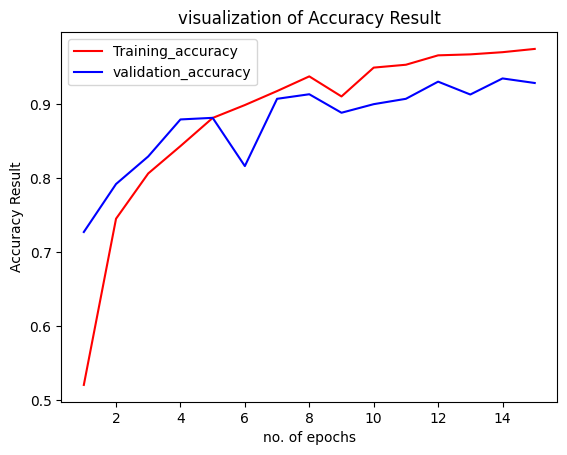

In [33]:
epochs =[i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation_accuracy')
plt.xlabel("no. of epochs")
plt.ylabel("Accuracy Result")
plt.title("visualization of Accuracy Result")
plt.legend()
plt.show()

SOME OTHER METRICS FOR MODEL EVALUATION

In [34]:
class_name = validation_set.class_names
class_name

['bacterial_leaf_blight',
 'brown_spot',
 'healthy',
 'leaf_blast',
 'leaf_scald',
 'narrow_brown_spot',
 'neck_blast',
 'rice_hispa',
 'sheath_blight',
 'tungro']

In [35]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
 

)

Found 2761 files belonging to 10 classes.


In [36]:
y_pred =model.predict(test_set)
y_pred,y_pred.shape

87/87 ━━━━━━━━━━━━━━━━━━━━ 52s 597ms/step


(array([[9.9887639e-01, 2.0372443e-05, 6.3924293e-05, ..., 1.5754698e-06,
         9.7041210e-04, 1.3114067e-07],
        [9.9902666e-01, 1.6981586e-06, 8.7838743e-07, ..., 2.6952745e-05,
         7.6612266e-04, 6.4173866e-05],
        [5.6076187e-01, 7.1660405e-10, 1.7280954e-11, ..., 7.0459207e-09,
         4.3923795e-01, 4.1144301e-09],
        ...,
        [4.0372623e-05, 6.4936195e-08, 2.4543738e-07, ..., 3.6896766e-09,
         3.0189547e-05, 9.9985635e-01],
        [3.6778885e-05, 5.1102569e-07, 8.9708667e-09, ..., 3.6617387e-10,
         1.3322311e-05, 9.9994850e-01],
        [8.0689297e-06, 2.3280295e-07, 2.4080620e-07, ..., 3.5656683e-04,
         8.0818725e-05, 9.9955350e-01]], dtype=float32),
 (2761, 10))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [38]:
predicted_categories

<tf.Tensor: shape=(2761,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9])>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(2761,), dtype=int32, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int32)>

In [40]:
import tensorflow as tf

# Concatenate true labels from the test set
true_categories = tf.concat([y for x, y in test_set], axis=0)

# Check the shape of true_categories to ensure it is correct
print("Shape of true_categories:", true_categories.shape)

# Apply tf.argmax based on the shape of true_categories
if len(true_categories.shape) == 1:
    # If already 1D, no need to apply tf.argmax
    y_true = true_categories
else:
    # If one-hot encoded, apply tf.argmax along the last axis
    y_true = tf.argmax(true_categories, axis=-1)

# Predict the categories


# Print predictions and true labels
print("Predicted Categories:", predicted_categories)
print("True Categories:", y_true)

Shape of true_categories: (2761,)
Predicted Categories: tf.Tensor([0 0 0 ... 9 9 9], shape=(2761,), dtype=int64)
True Categories: tf.Tensor([0 0 0 ... 9 9 9], shape=(2761,), dtype=int32)


In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

bacterial_leaf_blight       1.00      0.99      0.99       263
           brown_spot       0.89      0.91      0.90       279
              healthy       0.88      0.90      0.89       282
           leaf_blast       0.85      0.87      0.86       324
           leaf_scald       0.95      0.96      0.96       308
    narrow_brown_spot       0.90      0.90      0.90       269
           neck_blast       0.99      0.98      0.99       198
           rice_hispa       0.96      0.86      0.91       252
        sheath_blight       0.91      0.94      0.93       279
               tungro       0.99      0.99      0.99       307

             accuracy                           0.93      2761
            macro avg       0.93      0.93      0.93      2761
         weighted avg       0.93      0.93      0.93      2761



In [43]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[260,   0,   0,   1,   0,   0,   0,   0,   2,   0],
       [  0, 255,   2,  16,   0,   4,   0,   0,   2,   0],
       [  0,   8, 253,   9,   2,   1,   0,   7,   2,   0],
       [  0,  15,   7, 282,   4,  13,   0,   0,   2,   1],
       [  0,   2,   0,   2, 295,   6,   0,   0,   3,   0],
       [  0,   4,   0,  11,   3, 241,   0,   0,  10,   0],
       [  0,   0,   0,   0,   0,   0, 195,   0,   1,   2],
       [  0,   3,  26,   3,   0,   0,   1, 217,   2,   0],
       [  0,   0,   1,   6,   5,   3,   0,   1, 263,   0],
       [  0,   0,   0,   1,   0,   1,   0,   0,   1, 304]])

##Confusion Matrix Visualization

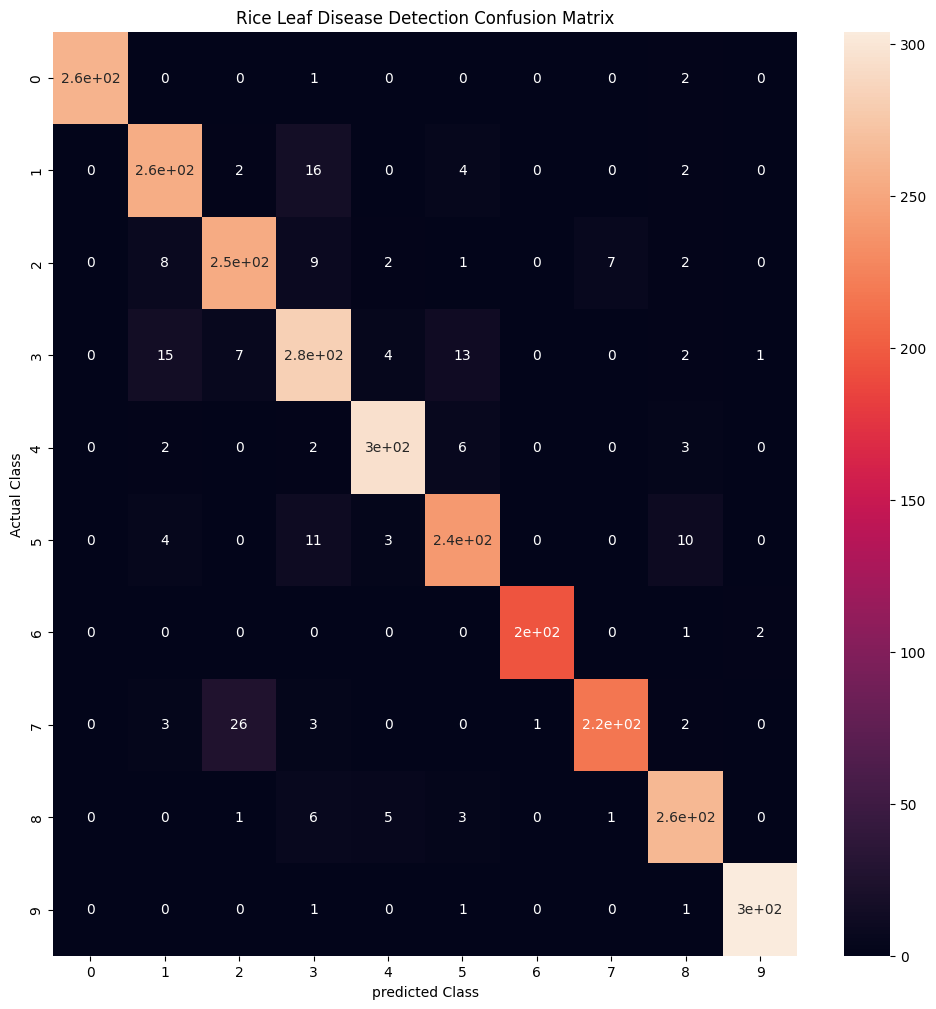

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted Class")
plt.ylabel("Actual Class")
plt.title("Rice Leaf Disease Detection Confusion Matrix")
plt.show()